In [2]:
import pyunicorn.timeseries as ts
import numpy as np
import matplotlib.pyplot as plt
import csv
import random
import scipy.signal as sig

In [3]:
with open("ECG200_TRAIN.txt") as f:
    ecg_train = f.read()

In [4]:
ecg_train = np.genfromtxt("ECG200_TRAIN.txt")

In [17]:
def surrogate(x, tag, niters=20):
    surr = ts.surrogates.Surrogates(x)
    if tag.lower() == "fft":
        return surr.correlated_noise_surrogates()
    elif tag.lower() == "iafft":
        return  surr.refined_AAFT_surrogates(niters)

In [18]:
X_train = ecg_train[:,1:]
y_train = (ecg_train[:,0] + 1) / 2

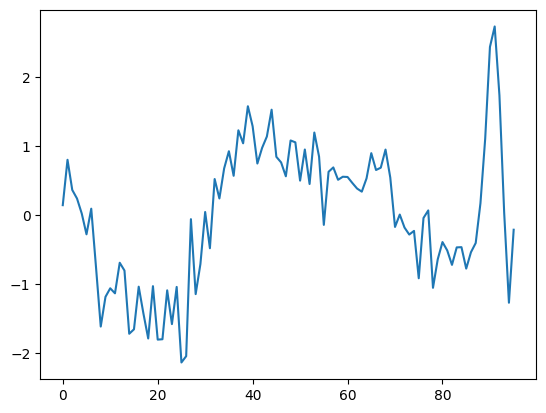

In [19]:
plt.plot(X_train[1, :])
plt.show()

In [20]:
x = ts.surrogates.Surrogates(X_train)

Generated an instance of the Surrogates class.


In [21]:
X_train[:].reshape(-1).shape

(9600,)

In [22]:
?plt.hist

Signature:
plt.hist(
    x: 'ArrayLike | Sequence[ArrayLike]',
    bins: 'int | Sequence[float] | str | None' = None,
    *,
    range: 'tuple[float, float] | None' = None,
    density: 'bool' = False,
    weights: 'ArrayLike | None' = None,
    cumulative: 'bool | float' = False,
    bottom: 'ArrayLike | float | None' = None,
    histtype: "Literal['bar', 'barstacked', 'step', 'stepfilled']" = 'bar',
    align: "Literal['left', 'mid', 'right']" = 'mid',
    orientation: "Literal['vertical', 'horizontal']" = 'vertical',
    rwidth: 'float | None' = None,
    log: 'bool' = False,
    color: 'ColorType | Sequence[ColorType] | None' = None,
    label: 'str | Sequence[str] | None' = None,
    stacked: 'bool' = False,
    data=None,
    **kwargs,
) -> 'tuple[np.ndarray | list[np.ndarray], np.ndarray, BarContainer | Polygon | list[BarContainer | Polygon]]'
Docstring:
Compute and plot a histogram.

This method uses `numpy.histogram` to bin the data in *x* and count the
number of values in eac

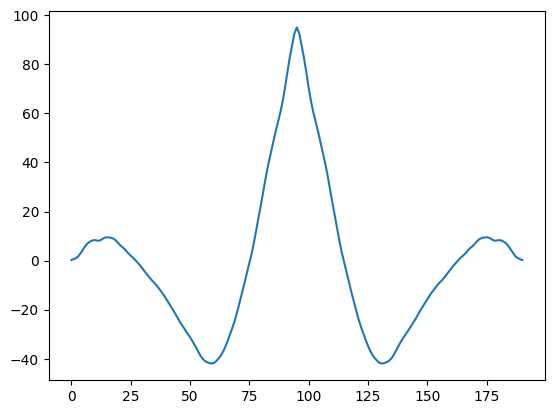

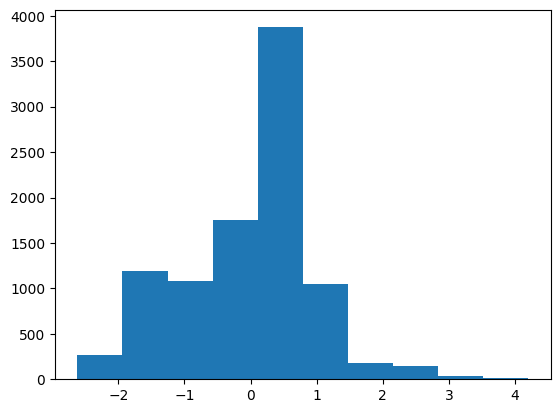

In [23]:
plt.plot(np.correlate(X_train[0,:], X_train[0,:], mode='full'))
plt.show()
plt.hist(X_train.reshape(-1))
plt.show()

Generating correlated noise surrogates...
Calculating original data fft...


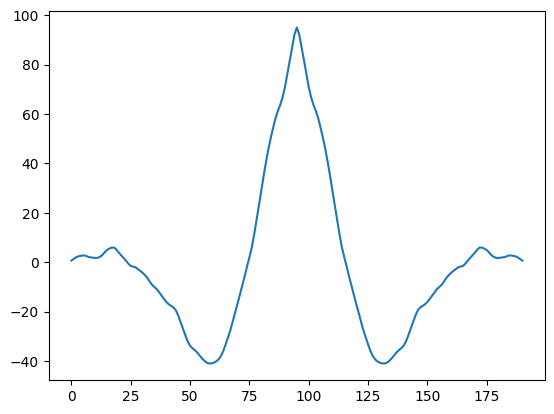

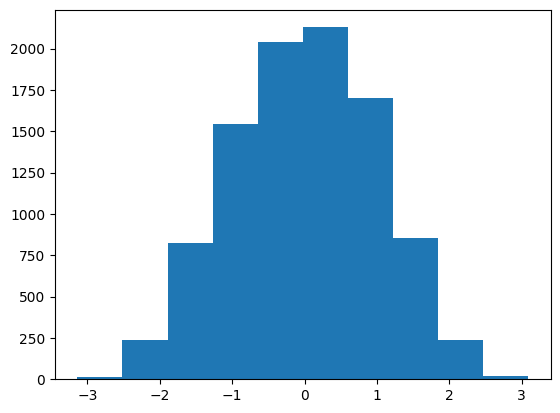

In [24]:
x_sur = x.correlated_noise_surrogates()
plt.plot(sig.correlate(x_sur[0,:], x_sur[0,:]))
plt.show()
plt.hist(x_sur.reshape(-1))
plt.show()

Generated an instance of the Surrogates class.
Generating correlated noise surrogates...
Calculating original data fft...


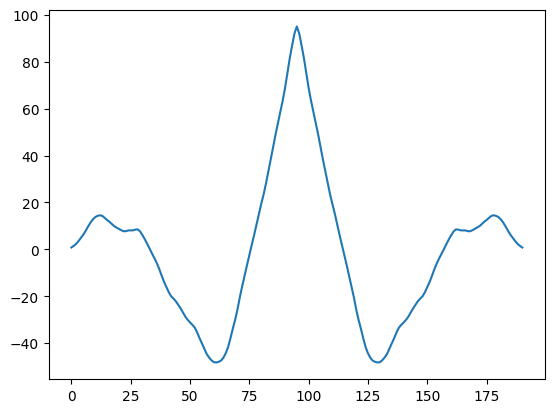

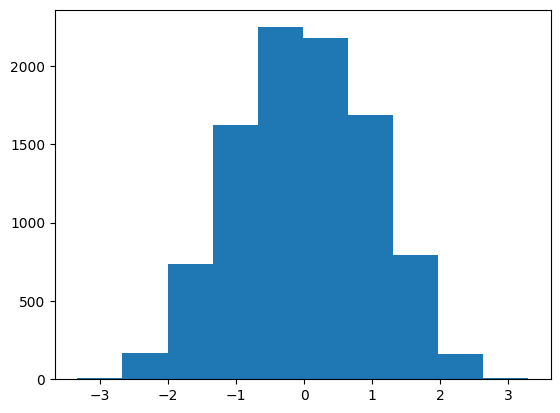

In [27]:
x_sur2 = surrogate(X_train, "FFT")

plt.plot(np.correlate(x_sur2[0,:], x_sur2[0,:], mode='full'))
plt.show()
plt.hist(x_sur2.reshape(-1))
plt.show()

Generated an instance of the Surrogates class.
Calculating original data fft...


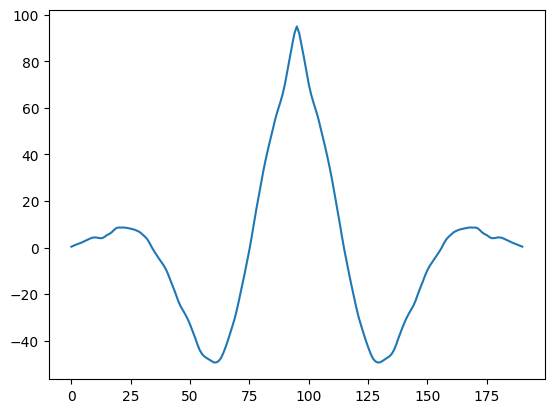

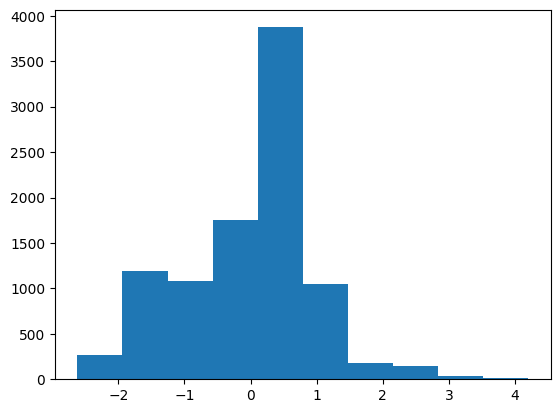

In [29]:
x_sur3 = surrogate(X_train, "IAFFT", niters=20)
plt.plot(np.correlate(x_sur3[0,:], x_sur3[0,:], mode='full'))
plt.show()
plt.hist(x_sur3.reshape(-1))
plt.show()

In [78]:
x_sur.shape

(100, 96)